### Treść zadania

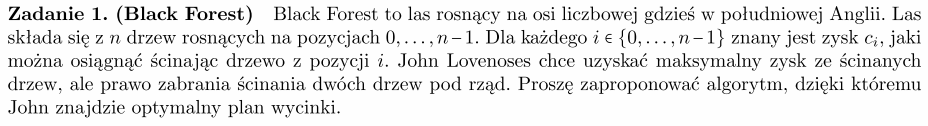

# I Sposób
### (Wymaga więcej pamięci - tablica kwadratowa)

### Omówienie algorytmu

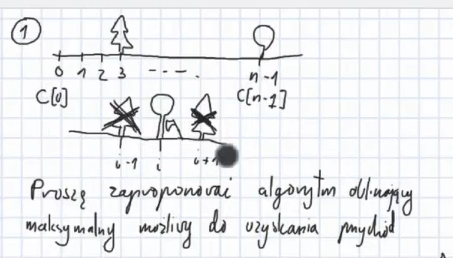

Funkcja, jaką opiszemy algorytm dynamiczny, jest następująca:
$ f(i, j) $ - maksymalny zysk ze ścięcia drzew, wybierając drzewa spośród drzew o indeksach $ 0, 1, 2, ..., i - 1, i $ w taki sposób, że nie są ścinane żadne 2 sąsiednie drzewa oraz ścinamy maksymalnie $ j $ drzew.
<br><br>
Warto zauważyć, że maksymalnie można ściąć $ \left \lceil{\frac{n}{2}}\right \rceil $ drzew (gdy ścinane jest co drugie drzewo, w przypadku liczb nieparzystych, np. 7 drzew, są to 4 drzewa, a w przypadku liczb parzystych - zawsze połowa liczby wszystkich drzew). Z tego też powodu, tworzymy tablicę $ F $ o wymiarach $ n \times \left \lceil{\frac{n}{2}}\right \rceil $, gdzie $ i $ indeks wiersza oznacza, że ścinamy tylko drzewa spośród drzew od $ 0 $ do $ i $ włącznie, a $ j $ indeks kolumny, że ścinamy maksymalnie $ j $ drzew.
<br>
Podczas podejmowania decyzji, czy warto ściąć dane drzewo, sprawdzamy, czy profit dla poprzenich $ i - 1 $ drzew jest większy, czy być może lepiej się opłacało ściąć drzewa spośród tych do $ i - 2 $. włącznie (tak, aby otrzymać minimalnie 1 drzewo odstępu) i ściąć obecnie sprawdzane drzewo.

### Złożoność

###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

#### Bottom-up

In [1]:
def max_profit(T: 'values of trees'):
    if not T: return 0
    if len(T) <= 2: return max(T)
    
    n = len(T)
    m = int(n / 2 + 1.5)  # Max number of trees that can be cut
    F = [[0] * m for _ in range(n)]
    
    # Fill the first two rows of an array as there is only one choice
    # (from the first two trees a lumberjack will choose only the one
    # tree of the greater profit as he cannot cut both threes)
    for j in range(1, m):
        F[0][j] = T[0] 
    
    curr_max = max(T[0], T[1])
    for j in range(1, m):
        F[1][j] = curr_max
        
    # Choose the best profit for the remaining trees
    for i in range(2, n):
        for j in range(1, m):
            F[i][j] = max(F[i - 2][j - 1] + T[i], F[i - 1][j])
            
    print(*F, sep='\n')
    
    return F[n - 1][m - 1]

###### Kilka testów

In [2]:
T = [1, 8, 3, 4, 5, 1, 2]

print(max_profit(T))

[0, 1, 1, 1, 1]
[0, 8, 8, 8, 8]
[0, 8, 8, 8, 8]
[0, 8, 12, 12, 12]
[0, 8, 13, 13, 13]
[0, 8, 13, 13, 13]
[0, 8, 13, 15, 15]
15


In [3]:
T = [1, 8, 3, 4, 5, 2, 0, 0, 0, 0]

print(max_profit(T))

[0, 1, 1, 1, 1, 1]
[0, 8, 8, 8, 8, 8]
[0, 8, 8, 8, 8, 8]
[0, 8, 12, 12, 12, 12]
[0, 8, 13, 13, 13, 13]
[0, 8, 13, 14, 14, 14]
[0, 8, 13, 14, 14, 14]
[0, 8, 13, 14, 14, 14]
[0, 8, 13, 14, 14, 14]
[0, 8, 13, 14, 14, 14]
14


In [4]:
T = [1, 0, 8, 0, 3, 0, 4, 0, 5, 0, 2]

print(sum(T))
print(max_profit(T))

23
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 8, 9, 9, 9, 9, 9]
[0, 8, 9, 9, 9, 9, 9]
[0, 8, 11, 12, 12, 12, 12]
[0, 8, 11, 12, 12, 12, 12]
[0, 8, 12, 15, 16, 16, 16]
[0, 8, 12, 15, 16, 16, 16]
[0, 8, 13, 17, 20, 21, 21]
[0, 8, 13, 17, 20, 21, 21]
[0, 8, 13, 17, 20, 22, 23]
23


### (Dodatkowo) Zwracanie rozwiązania

#### Bottom-up

In [5]:
def max_profit(T: 'values of trees'):
    if not T: return 0
    if len(T) <= 2: return max(T)
    
    n = len(T)
    m = int(n / 2 + 1.5)  # Max number of trees that can be cut
    F = [[0] * m for _ in range(n)]
    
    # Fill the first two rows of an array as there is only one choice
    # (from the first two trees a lumberjack will choose only the one
    # tree of the greater profit as he cannot cut both threes)
    for j in range(1, m):
        F[0][j] = T[0] 
    
    curr_max = max(T[0], T[1])
    for j in range(1, m):
        F[1][j] = curr_max
        
    # Choose the best profit for the remaining trees
    for i in range(2, n):
        for j in range(1, m):
            F[i][j] = max(F[i - 2][j - 1] + T[i], F[i - 1][j])
            
#     print(*F, sep='\n')
    
    return F[n - 1][m - 1], F


def get_solution(F: 'array returned by max_profit function'):
    i = len(F) - 1
    j = len(F[0]) - 1
    res = []
    
    def recur(i, j):
#         print(i, j)
        if i < 0: return
        if i == 0:
            res.append(i)
        elif F[i][j] == F[i - 1][j]:
            recur(i - 1, j)
        else:
            recur(i - 2, j - 1)
            res.append(i)
            
    recur(i, j)
    
    print(res)

###### Kilka testów

In [6]:
T = [8, 1, 3, 4, 5, 1, 2]

profit, F = max_profit(T)
print('Profit:', profit)
print('Solution:', get_solution(F))

Profit: 18
[0, 2, 4, 6]
Solution: None


In [7]:
T = [8, 12, 3, 4, 7, 1, 2, 10]

profit, F = max_profit(T)
print('Profit:', profit)
print('Solution:', get_solution(F))

Profit: 29
[1, 4, 7]
Solution: None


# II Sposób (dużo lepsze)
### (Wymaga mniej pamięci - działa w miejscu i jest szybszy)

### Omówienie

Ten sposób jest nieco prostszy i lepszy, bo zużywa mniej (stałą ilość) pamięci. Tym razem definiujemy funkcję następująco: <br>
$ f(i) $ - maksymalny zysk, jaki uzyksamy, ścinając drzewa spośród tych, które leżą na indeksach $ 0, 1, 2, ..., i - 1, i $
<br><br>
###### UWAGA:
Nie musimy używać zależnej od wielkości danych wejściowych ilości pamięci, ponieważ zawsze będziemy się odwoływać jedynie albo do poprzedniej wartości ($ f(i - 1) $), jeżeli nie bierzemy bierzącego drzewa, bo wynik dla poprzednich drzew, z których ostatnim może być drzewo o indeksie $ i - 1 $, był większy, albo do $ f(i - 2) $, jeżeli bierzemy obecne drzewo i najlepszy wynik dla drzew, z których ostatnie może się mieścić pod indeksem $ i - 2 $.

### Złożoność

###### Obliczeniowa:
$ O(n) $
###### Pamięciowa:
$ O(1) $

### Implementacja

In [8]:
def max_profit(T: 'values of trees'):
    if not T: return 0
    if len(T) <= 2: return max(T)
    
    n = len(T)
    f_2 = T[0]
    f_1 = max(T[0], T[1])
    
    for i in range(2, n):
        f_1, f_2 = max(f_2 + T[i], f_1), f_1
    
    return f_1

###### Kilka testów

In [9]:
T = [1, 8, 3, 4, 5, 1, 2]

print(max_profit(T))

15


In [10]:
T = [8, 1, 3, 4, 5, 1, 2]

print(max_profit(T))

18


In [11]:
T = [8, 12, 3, 4, 7, 1, 2, 10]

print(max_profit(T))

29
